# Статистические тесты

Предыдущие юниты были посвящены статистическим тестам для количественных признаков, а в этом мы рассмотрим тесты для категориальных.

Основное отличие категориальных признаков от количественных состоит в том, что над категориальными значениями нельзя выполнять арифметические операции: вычислять среднее, медиану, дисперсию и т. д.

Для категориальных признаков можно только посчитать количество объектов в выборке с каждым из значений категориального признака, то есть посчитать частоты. Например, в выборке клиентов сотового оператора есть 50 человек с тарифом «Ультима», 30 человек — с тарифом «Мега» и 60 человек — с тарифом «Абсолют».

Все статистические тесты для категориальных признаков основаны именно на подсчёте и сравнении частот.

Тестов для категориальных признаков много: они отличаются по количеству сравниваемых групп, по зависимости в группах, по ограничениям на анализируемые данные. Мы рассмотрим два наиболее популярных теста, которые позволяют решать большинство задач:

``Критерий хи-квадрат`` позволяет оценить, связаны ли между собой два категориальных признака.

**Примеры гипотез:**

* Есть ли связь между городом и уровнем образования его жителей?
* Есть ли связь между тарифом сотового оператора и сферой работы клиента?

``Критерий Мак-Немара`` позволяет определить, есть ли статистически значимые различия в частоте появления бинарных признаков в двух связанных выборках.

**Примеры гипотез:**

* Отличается ли доля заболевших гриппом до и после прививки?
* Отличаются ли доли товаров, считающихся бракованными, при проверке на новом и старом оборудовании?

Для этих тестов мы приведём описание, сведения о функциях, которые реализуют их в Python-библиотеках, и примеры использования на Python.

Функции для тестов над категориальными переменными отдают на выход уровень значимости p, по которому мы можем принять решение о верности выдвинутых гипотез.

## КРИТЕРИЙ ХИ-КВАДРАТ

``Критерий хи-квадрат () используют, чтобы определить связь между двумя категориальными переменными. Это одновыборочный тест: мы анализируем взаимосвязь между двумя признаками объектов одной выборки.``

Критерий хи-квадрат реализован в функции chi2_contingency модуля stats библиотеки scipy.

**Основные входные параметры:**

* observed — таблица сопряжённости для двух категориальных переменных.

``Таблица сопряжённости`` — это средство представления совместного распределения двух переменных, в котором:

* строки соответствуют возможным значениям первого признака;
* столбцы соответствуют возможным значениям второго признака;
* значения ячеек — это количество объектов в выборке с соответствующими значениями первого и второго признаков.

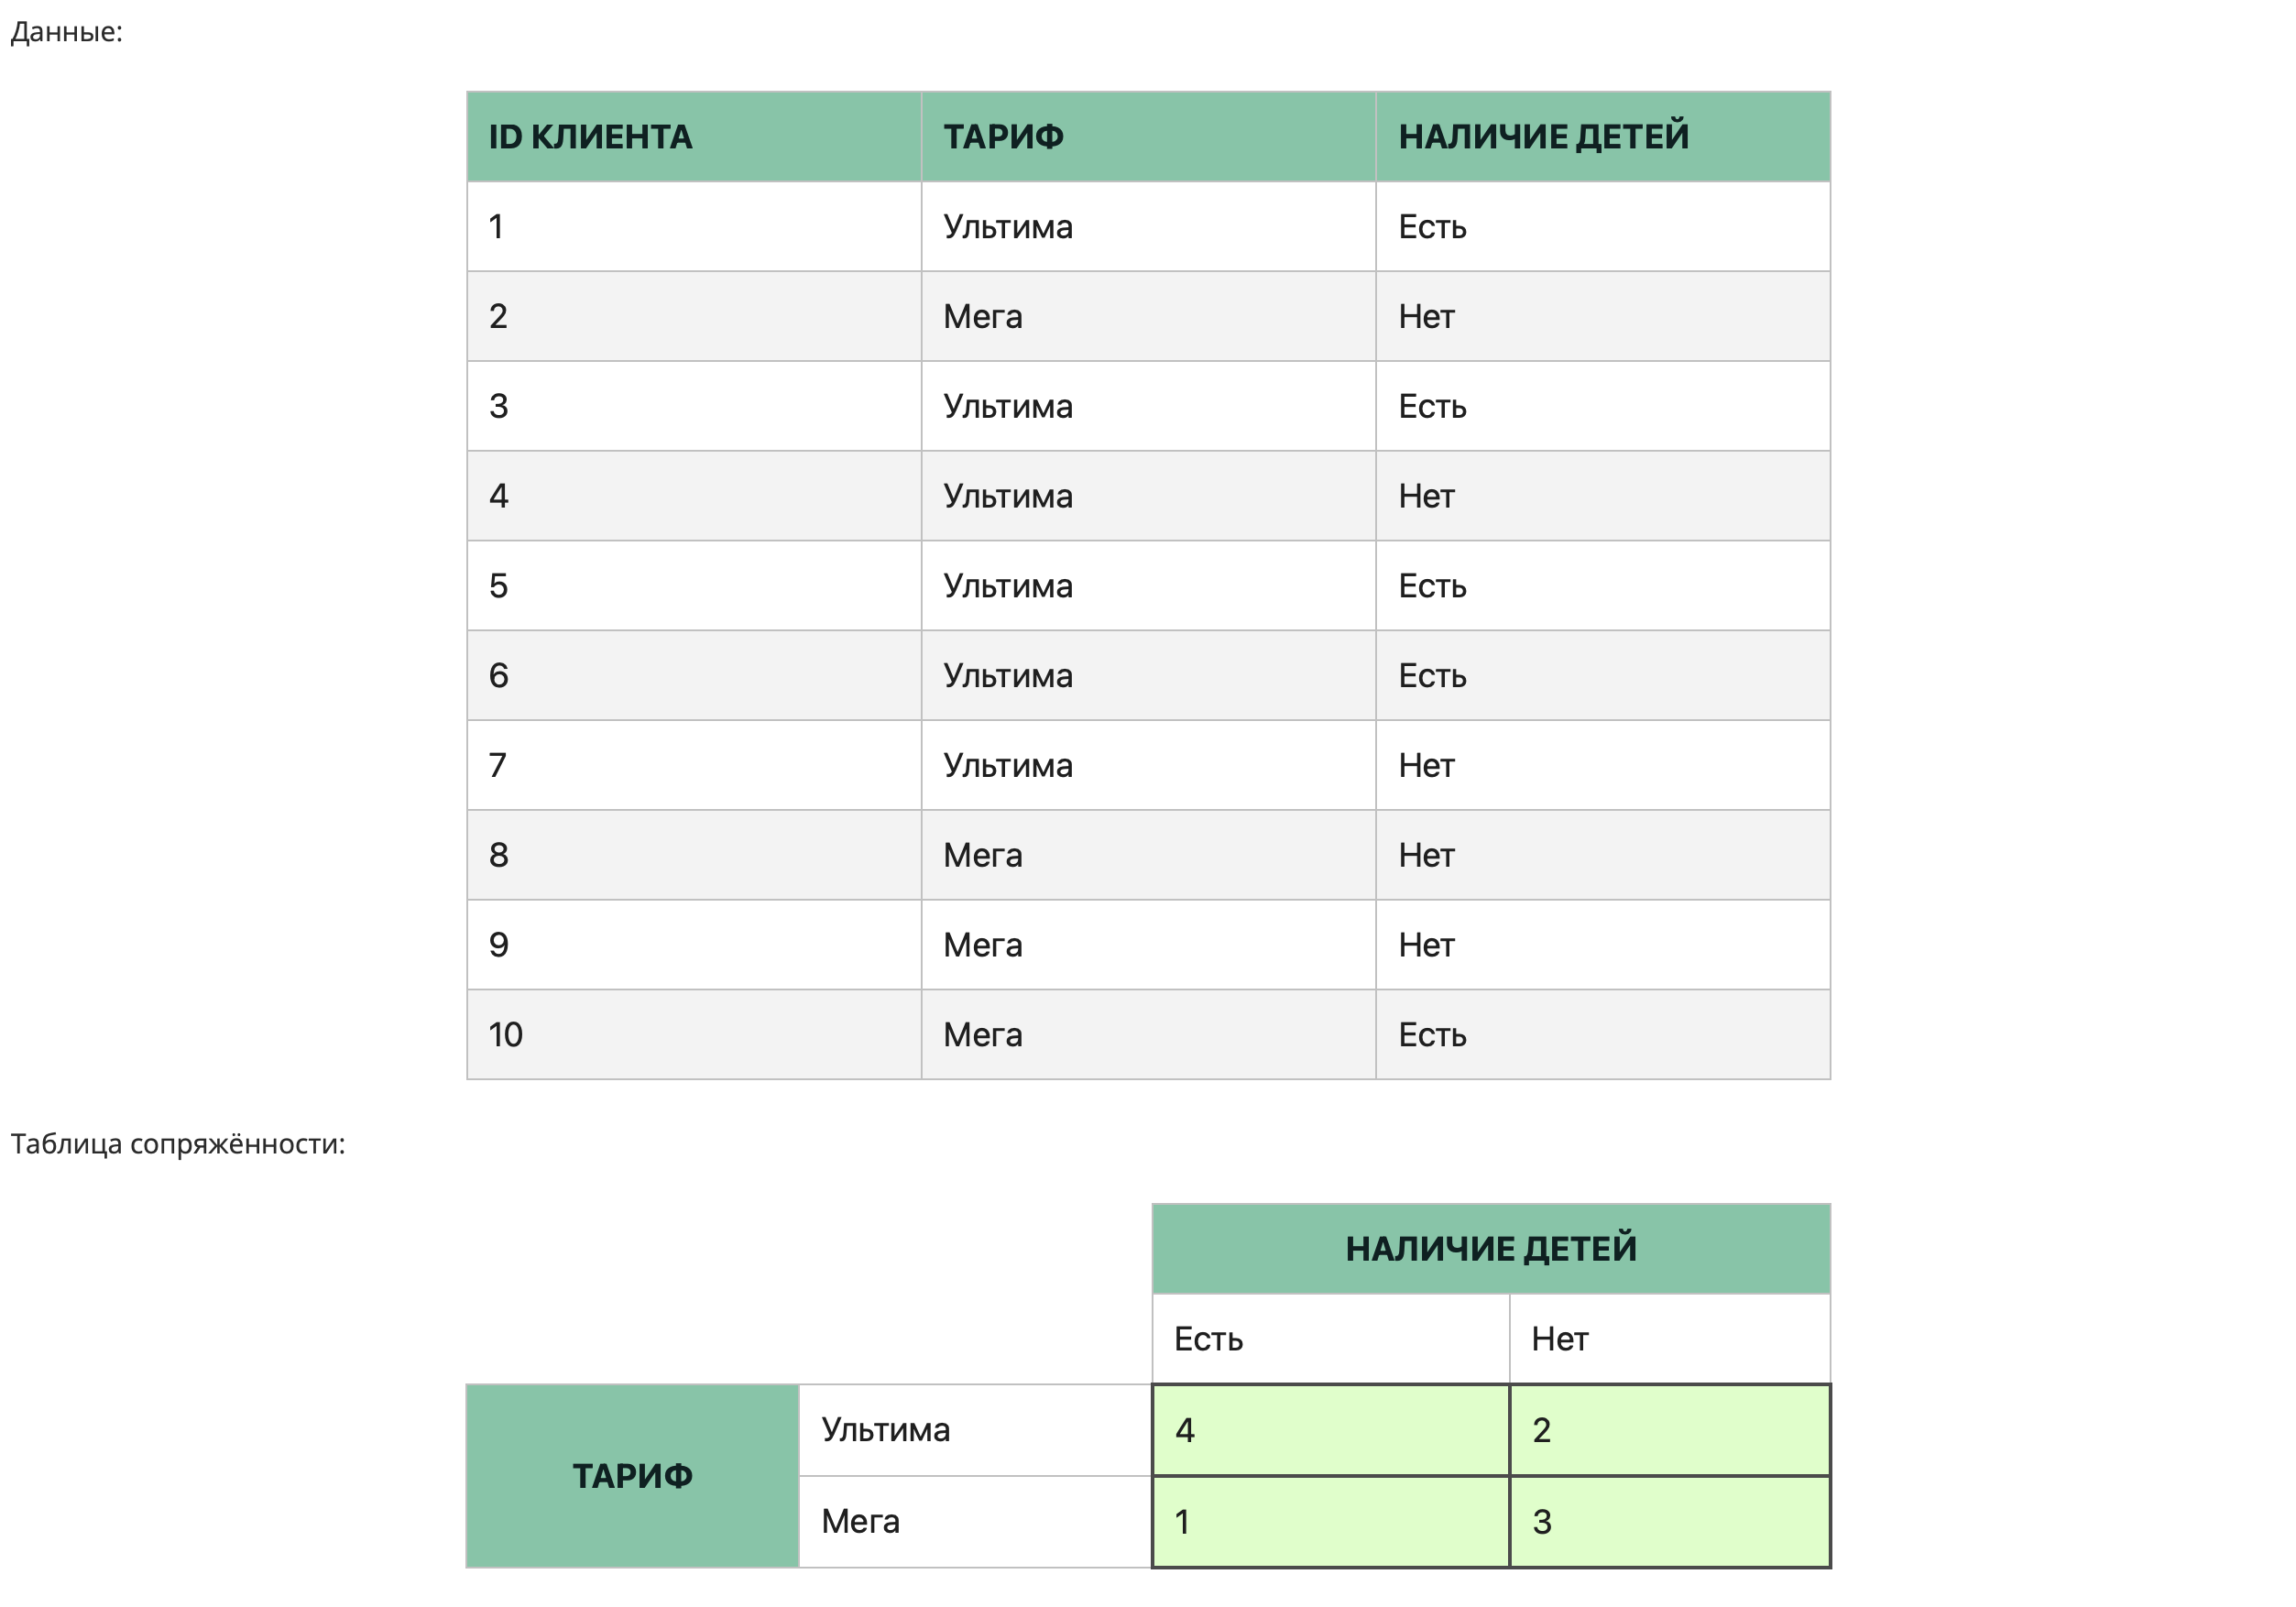

Условие применимости критерия хи-квадрат — наличие как минимум пяти объектов в каждой ячейке. Если это условие не выполняется, необходимо обратиться к точному критерию Фишера.

Таблицу сопряжённости можно построить с помощью функции crosstab библиотеки Pandas. На вход функции подаются два списка со значениями первого и второго признаков, для которых необходимо построить таблицу сопряжённости.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Оператор сотовой связи хочет узнать, есть ли связь между тарифом, который выбрал клиент, и наличием у него детей.

Были собраны необходимые данные по 39 случайным клиентам.

Уровень значимости необходимо взять равным 0.05.

**РЕШЕНИЕ**

Сформулируем гипотезы:

* Нулевая гипотеза: признаки «Тариф» и «Наличие детей» независимы.
* Альтернативная гипотеза: признаки «Тариф» и «Наличие детей» взаимосвязаны.

Решение на Python:

In [8]:
import scipy.stats as stats
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_tarif_children.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Тариф'], data['Наличие детей'])

# проводим тест
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.373
# p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

p-value = 0.373
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


``Вывод: у нас нет оснований утверждать, что признаки «Тариф» и «Наличие детей» взаимосвязаны.``

## КРИТЕРИЙ МАК-НЕМАРА

``Критерий Мак-Немара — это двухвыборочный тест для связанных выборок, который позволяет сравнить бинарные признаки.``

Критерий Мак-Немара реализован в функции mcnemar модуля stats библиотеки statsmodels.

**Основные входные параметры:**

* table — таблица сопряжённости размера 2х2.

**ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON**

**БИЗНЕС-ЗАДАЧА**

Оператор сотовой связи хочет увеличить долю клиентов, которые пользуются мобильным приложением. Для этого провели соответствующую рекламную кампанию. Необходимо узнать, изменилась ли доля клиентов, пользующихся приложением, после проведения рекламной кампании.

Были собраны данные об использовании приложения по 30 случайным клиентам до и после рекламной кампании.

Уровень значимости необходимо взять равным 0.05.

**РЕШЕНИЕ**

Сформулируем гипотезы:

* Нулевая гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, не изменилась.
* Альтернативная гипотеза: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.

Решение на Python:

In [9]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# задаём уровень значимости
alpha = 0.05 

data = pd.read_csv('data/cat_variables_usage.csv')

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['До'], data['После'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# p-value = 0.013
# p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.

p-value = 0.013
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


``Вывод: после просмотра рекламы доля клиентов, которые пользуются приложением, изменилась.``

``Примечание. Среди категориальных признаков выделяют порядковые — это признаки, значения которых можно упорядочить: например, уровень образования, удовлетворённость предоставленными услугами и т. д. К таким признакам можно применять непараметрические тесты для количественных признаков, предварительно преобразовав категориальную шкалу в количественную.``

Преобразование можно сделать с помощью функции replace библиотеки pandas. На вход функции необходимо подать список значений, которые нужно заменить, и список значений, на которые нужно заменить первоначальные значения. Пример выполнения преобразования:

In [14]:
# создание датасета
data = pd.DataFrame(["среднее профессиональное", "высшее образование", "основное общее", "среднее общее", "основное общее", "среднее профессиональное"], columns=['Уровень образования']) 
display(data)

# перевод категориального признака в количественный
data['Уровень образования'] = data['Уровень образования'].replace(["основное общее", "среднее общее", "среднее профессиональное", "высшее образование"], [1, 2, 3, 4])
display(data)

,Уровень образования
0,среднее профессиональное
1,высшее образование
2,основное общее
3,среднее общее
4,основное общее
5,среднее профессиональное


,Уровень образования
0,3
1,4
2,1
3,2
4,1
5,3


Выбор теста может казаться непростой задачей, но сейчас необязательно запоминать их все. Главное — понять, что правильный выбор теста зависит:

* от вопроса, на который мы хотим получить ответ;
* от того, связь между данными каких типов мы хотим проверить;
* от того, какие предположения о данных мы делаем.

Если при решении реальной задачи вы будете сомневаться в том, какой тест выбрать, попробуйте найти в статьях или выступлениях на конференциях, с помощью каких тестов отвечали на вопросы, подобные вашему, в других компаниях.

### Задание 9.2

In [18]:
data = pd.DataFrame([['Есть', 'Есть'], ['Есть', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Нет','Нет'], ['Нет', 'Нет'], ['Нет', 'Нет'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Есть', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Есть', 'Есть'], ['Нет', 'Есть'], ['Есть', 'Есть'], ['Нет', 'Нет'], ['Нет', 'Есть'], ['Нет', 'Нет']], columns=['Старая форма', 'Новая форма'])

alpha = 0.05 

# вычисляем таблицу сопряжённости
table = pd.crosstab(data['Старая форма'], data['Новая форма'])

# проводим тест
res = mcnemar(table)

# извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
    
display(table)


p-value = 0.035
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Новая форма,Есть,Нет
Старая форма,,
Есть,7,3
Нет,12,8
